#### Importing the dependencies

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Analysis

In [3]:
#loading dataset from csv file to a pandas df
big_mart_data=pd.read_csv("Train.csv")

In [4]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# number of data points and no of features
big_mart_data.shape

(8523, 12)

In [6]:
# getting some info about data
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
big_mart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#catagorical features
big_mart_data.select_dtypes(include="object").columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
#numerical features
big_mart_data.select_dtypes(exclude="object").columns.tolist()

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [10]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
big_mart_data.isnull().sum()/len(big_mart_data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
#Filling null using mean

In [13]:
big_mart_data["Item_Weight"].mean()

12.857645184135976

In [14]:
big_mart_data["Item_Weight"].fillna(big_mart_data["Item_Weight"].mean(),inplace=True)


In [15]:
big_mart_data.isnull().sum()/len(big_mart_data)*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [16]:
#Filling null using mode

In [17]:

mode_outlet_size = big_mart_data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0])

In [18]:
print(mode_outlet_size)

0        Small
1       Medium
2        Small
3        Small
4        Small
         ...  
8518     Small
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [19]:
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].fillna(mode_outlet_size)

In [20]:
big_mart_data.isnull().sum()/len(big_mart_data)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [21]:
#Data Analysis

In [22]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [24]:
#numerical columns

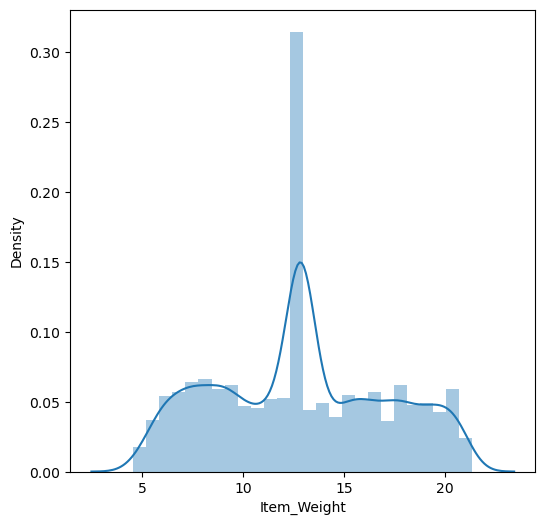

In [25]:
#Item_Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Weight"])
plt.show()

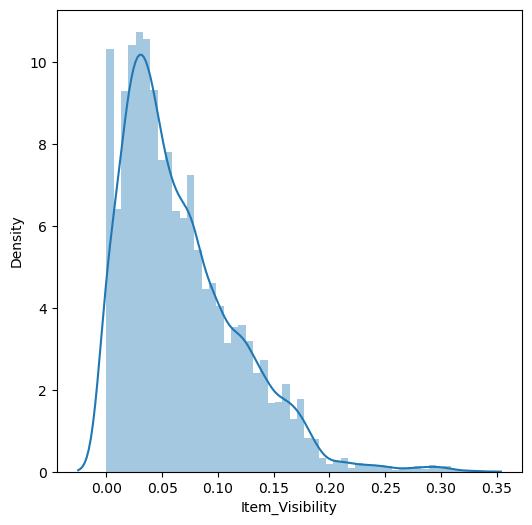

In [26]:
#Item_Visibility

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Visibility"])
plt.show()

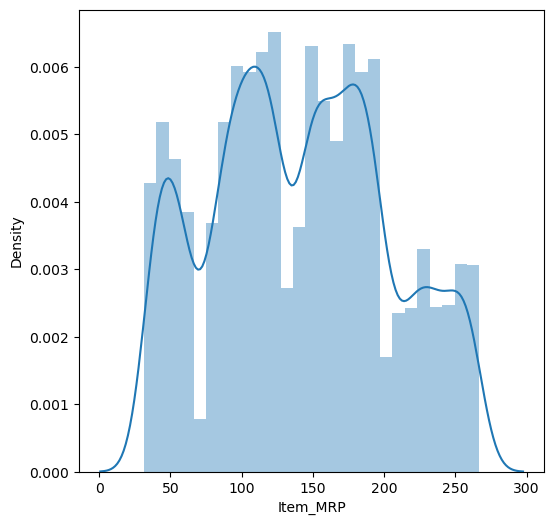

In [27]:
#Item_MRP
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_MRP"])
plt.show()

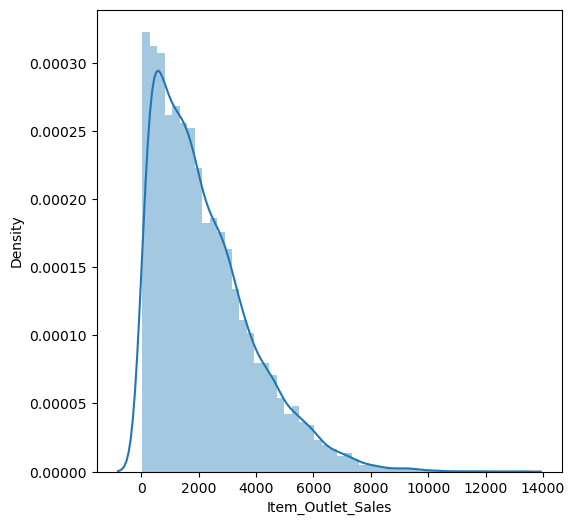

In [28]:
#Item_Outlet_Sales

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Outlet_Sales"])
plt.show()

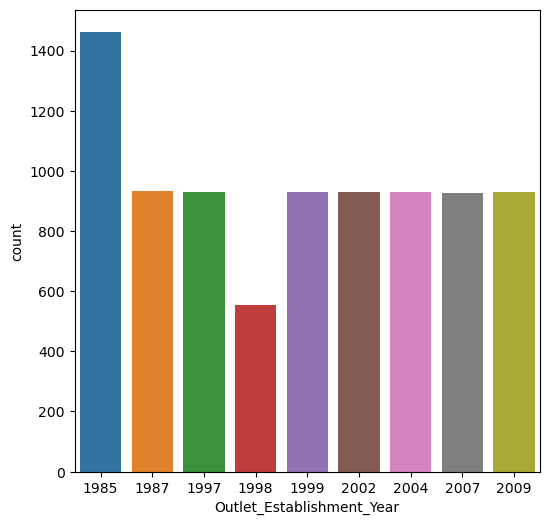

In [29]:
#Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=big_mart_data)
plt.show()

In [30]:
#catagorical features

In [31]:
big_mart_data.select_dtypes(include="object").columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

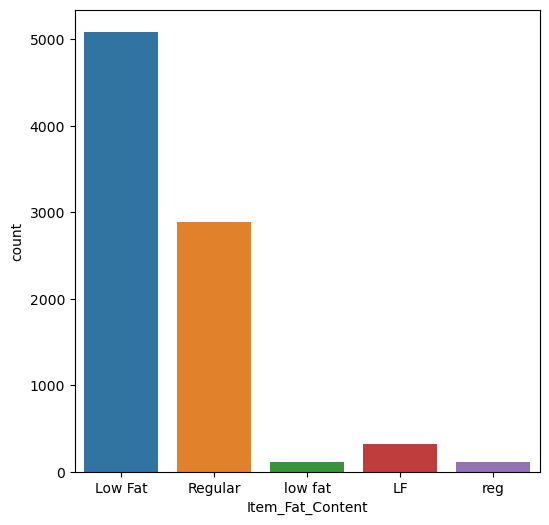

In [32]:
# Item_Fat_Content

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

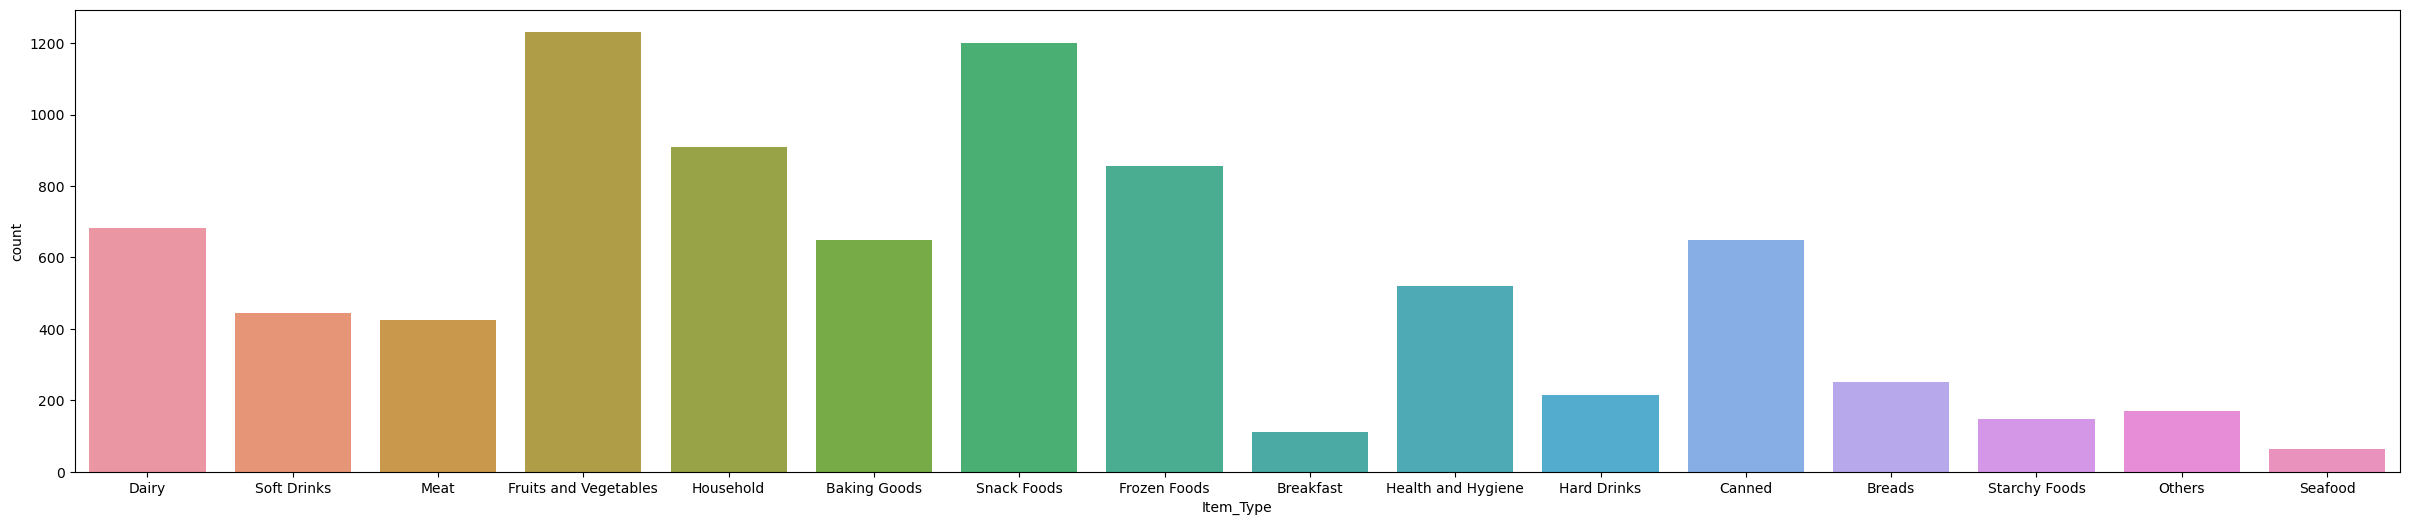

In [33]:
 # 'Item_Type'
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

In [34]:
big_mart_data["Outlet_Size"].unique

<bound method Series.unique of 0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

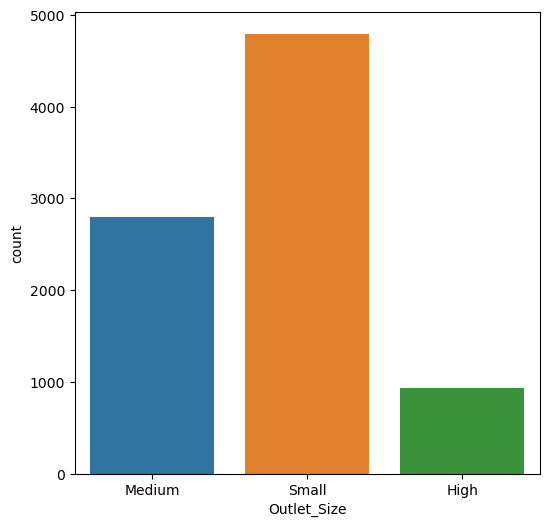

In [35]:
#Outlet_Size

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

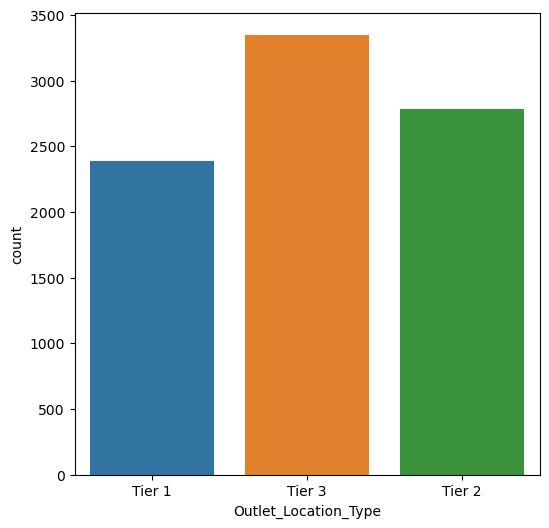

In [36]:
#Outlet_Location_Type
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=big_mart_data)
plt.show()

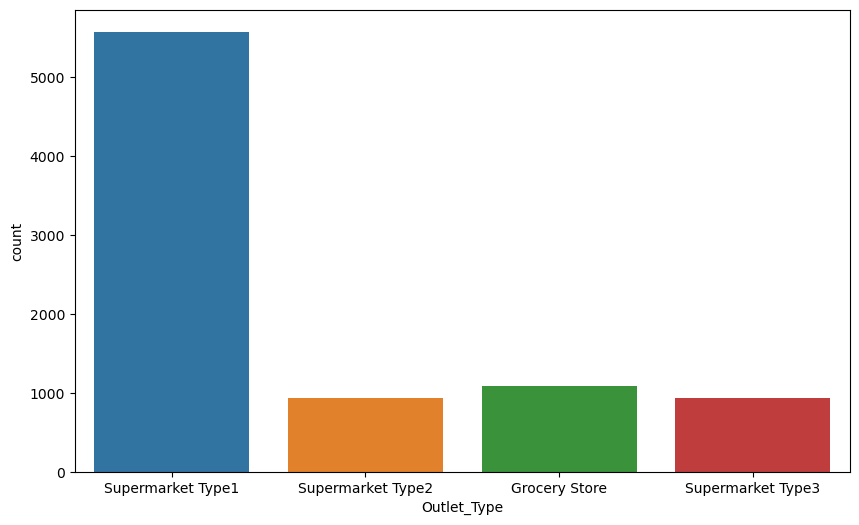

In [37]:
#Outlet_Type
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=big_mart_data)
plt.show()

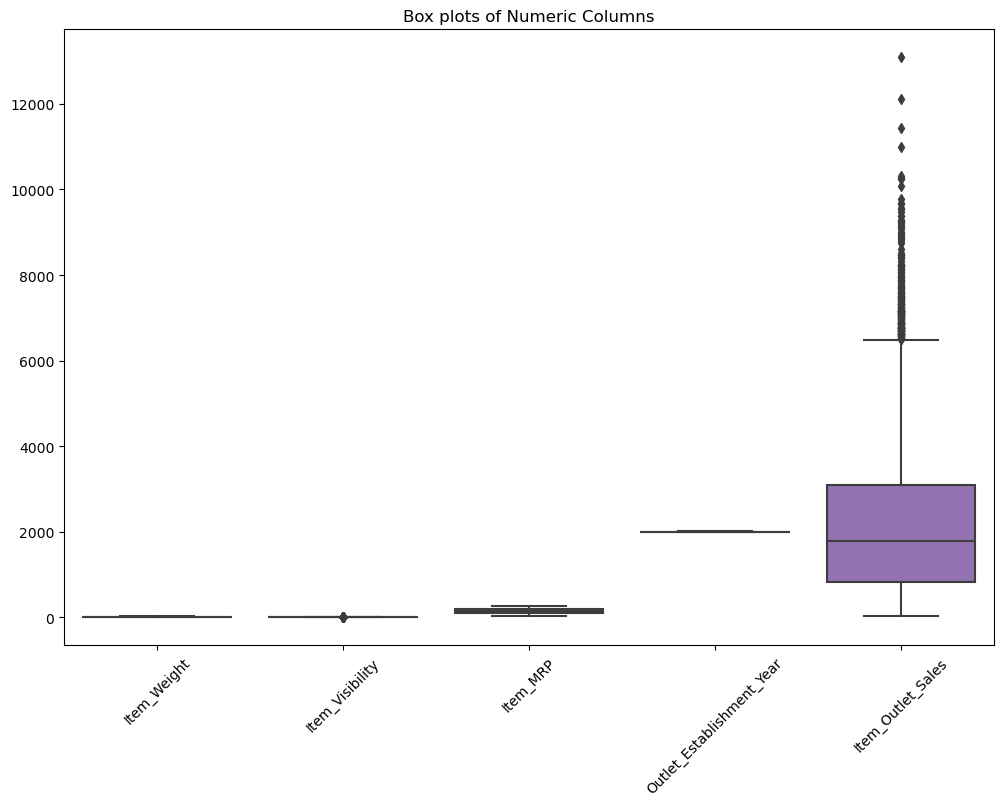

In [38]:
#outliers

plt.figure(figsize=(12, 8))
sns.boxplot(data=big_mart_data.select_dtypes(include=['number']))
plt.title('Box plots of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

#### Data pre-processing

In [39]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
big_mart_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [41]:
big_mart_data.replace({"Item_Fat_Content":{'low fat':'Low Fat','LF':"Low Fat",'reg':"Regular"}},inplace=True)

In [42]:
big_mart_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [43]:
big_mart_data.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [44]:
# 1. Item_Type Aggregation
item_type_mapping = {
    'Food': ['Fruits and Vegetables', 'Snack Foods', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Meat', 'Breads', 'Starchy Foods', 'Breakfast', 'Seafood'],
    'Non-Food': ['Household', 'Health and Hygiene', 'Others'],
    'Drinks': ['Soft Drinks', 'Hard Drinks']
}
big_mart_data['Item_Type_Aggregated'] = big_mart_data['Item_Type'].apply(lambda x: next((k for k, v in item_type_mapping.items() if x in v), 'Other'))


In [45]:
big_mart_data['Item_Type_Aggregated'].value_counts()

Food        6265
Non-Food    1599
Drinks       659
Name: Item_Type_Aggregated, dtype: int64

In [46]:
# 2. Item_Visibility Transformation
big_mart_data['Item_Visibility_Ratio'] = big_mart_data.groupby('Outlet_Identifier')['Item_Visibility'].transform(lambda x: x / x.mean())

In [47]:
# 3. Outlet_Years
current_year = pd.Timestamp.now().year
big_mart_data['Outlet_Years'] = current_year - big_mart_data['Outlet_Establishment_Year']

In [48]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Aggregated,Item_Visibility_Ratio,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,0.263912,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,0.315961,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,0.275634,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,0.000000,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Food,0.000000,37


In [49]:
columns_to_drop = ['Outlet_Establishment_Year', 'Item_Type', 'Item_Visibility']
big_mart_data.drop(columns=columns_to_drop, inplace=True)

In [50]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Aggregated,Item_Visibility_Ratio,Outlet_Years
0,FDA15,9.30,Low Fat,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,0.263912,25
1,DRC01,5.92,Regular,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,0.315961,15
2,FDN15,17.50,Low Fat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,0.275634,25
3,FDX07,19.20,Regular,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,0.000000,26
4,NCD19,8.93,Low Fat,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Food,0.000000,37


In [51]:
big_mart_data.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Aggregated'],
      dtype='object')

In [52]:
#Label encording
encoder=LabelEncoder()

In [53]:
big_mart_data["Item_Identifier"]=encoder.fit_transform(big_mart_data["Item_Identifier"])
big_mart_data["Item_Fat_Content"]=encoder.fit_transform(big_mart_data["Item_Fat_Content"])
big_mart_data["Item_Type_Aggregated"]=encoder.fit_transform(big_mart_data["Item_Type_Aggregated"])
big_mart_data["Outlet_Identifier"]=encoder.fit_transform(big_mart_data["Outlet_Identifier"])
big_mart_data["Outlet_Size"]=encoder.fit_transform(big_mart_data["Outlet_Size"])
big_mart_data["Outlet_Location_Type"]=encoder.fit_transform(big_mart_data["Outlet_Location_Type"])
big_mart_data["Outlet_Type"]=encoder.fit_transform(big_mart_data["Outlet_Type"])

In [54]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Aggregated,Item_Visibility_Ratio,Outlet_Years
0,156,9.30,0,249.8092,9,1,0,1,3735.1380,1,0.263912,25
1,8,5.92,1,48.2692,3,1,2,2,443.4228,0,0.315961,15
2,662,17.50,0,141.6180,9,1,0,1,2097.2700,1,0.275634,25
3,1121,19.20,1,182.0950,0,2,2,0,732.3800,1,0.000000,26
4,1297,8.93,0,53.8614,1,0,2,1,994.7052,2,0.000000,37


In [55]:
#spliting features and target

In [56]:
X=big_mart_data.drop(columns="Item_Outlet_Sales",axis=1)
y=big_mart_data["Item_Outlet_Sales"]

#### Spliting Data into train test

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#### Model bulding

In [59]:
Basemodel=XGBRegressor()

In [60]:
Basemodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Evaluation

In [61]:

y_pred = Basemodel.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("XGBRegressorR-squared value:", r_squared)

XGBRegressorR-squared value: 0.5225909966497237


In [62]:
r_squared_df = pd.DataFrame({'Model': ['XGBRegressor'],
                             'R-squared': [r_squared]})

In [63]:
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591


#### Improving model

In [64]:
from sklearn.feature_selection import RFE


X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBRegressor()


rfe = RFE(model, n_features_to_select=10)  


rfe.fit(X_train, y_train)


selected_features = X_train.columns[rfe.support_]


model.fit(X_train[selected_features], y_train)


y_pred = model.predict(X_test[selected_features])


r_squared = r2_score(y_test, y_pred)
print("XGBRegressor RFE :R-squared value:", r_squared)

XGBRegressor RFE :R-squared value: 0.543759155760153


In [65]:
new_row = {'Model': 'XGBRegressor RFE', 'R-squared': r_squared}


r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759


In [66]:
from sklearn.ensemble import GradientBoostingRegressor



X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_regressor = GradientBoostingRegressor()


gb_regressor.fit(X_train, y_train)


y_pred_gb = gb_regressor.predict(X_test)


r_squared_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor : R-squared =", r_squared_gb)


Gradient Boosting Regressor : R-squared = 0.6037392939452505


In [67]:
new_row = {'Model': 'Gradient Boosting Regressor', 'R-squared': r_squared_gb}

r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759
2,Gradient Boosting Regressor,0.603739


In [68]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import pandas as pd


X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_regressor = GradientBoostingRegressor()


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5, scoring='r2')
grid_search_gb.fit(X_train, y_train)


best_params_gb = grid_search_gb.best_params_


best_gb_regressor = GradientBoostingRegressor(**best_params_gb)
best_gb_regressor.fit(X_train, y_train)

y_pred_gb = best_gb_regressor.predict(X_test)


r_squared_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor (optimized): R-squared =", r_squared_gb)

Gradient Boosting Regressor (optimized): R-squared = 0.609279116460967


In [69]:
new_row = {'Model': 'Gradient Boosting Regressor (optimized): R-squared ', 'R-squared': r_squared_gb}

r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759
2,Gradient Boosting Regressor,0.603739
3,Gradient Boosting Regressor (optimized): R-squ...,0.609279


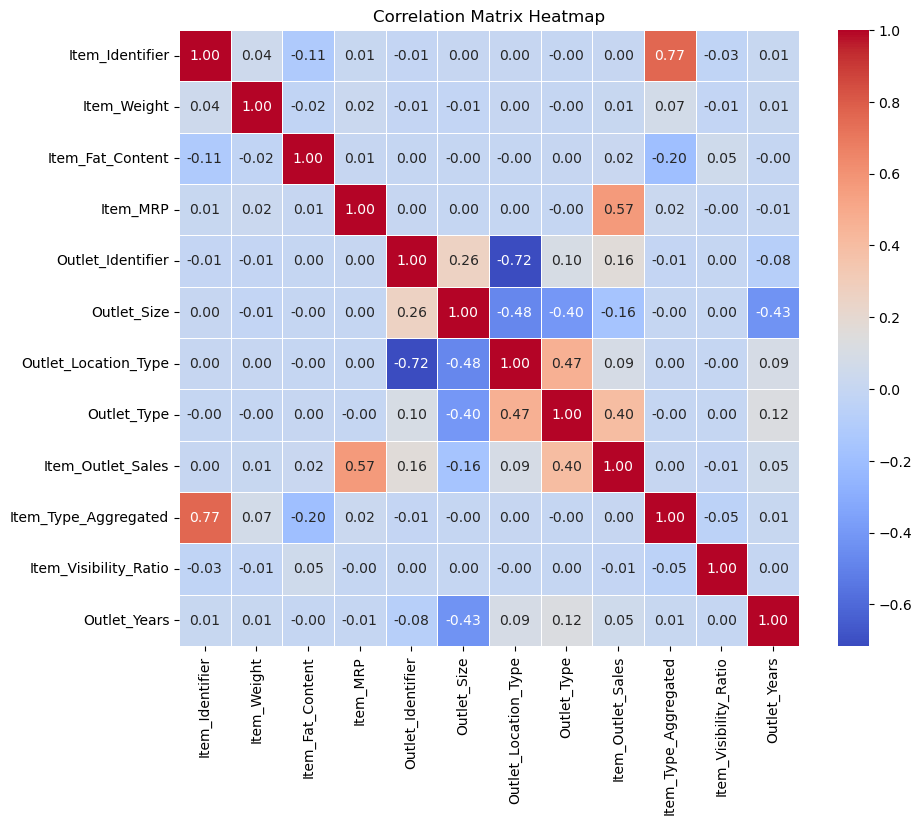

In [70]:
correlation_matrix = big_mart_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [71]:
big_mart_data=big_mart_data.drop(columns=["Item_Identifier"])

In [72]:

X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_regressor = GradientBoostingRegressor()

best_gb_regressor = GradientBoostingRegressor(**best_params_gb)
best_gb_regressor.fit(X_train, y_train)


y_pred_gb = best_gb_regressor.predict(X_test)


r_squared_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor (optimized) no multi co: R-squared =", r_squared_gb)

Gradient Boosting Regressor (optimized) no multi co: R-squared = 0.6101279829393382


In [73]:
new_row = {'Model': 'Gradient Boosting Regressor (optimized) no multi co: R-squared ', 'R-squared': r_squared_gb}

r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759
2,Gradient Boosting Regressor,0.603739
3,Gradient Boosting Regressor (optimized): R-squ...,0.609279
4,Gradient Boosting Regressor (optimized) no mul...,0.610128


In [74]:

X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(estimator=gb_regressor, n_features_to_select=9, step=1) 

# Fit RFE
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]


# Train the Gradient Boosting Regressor with the best hyperparameters and selected features
best_gb_regressor = GradientBoostingRegressor(**best_params_gb)
best_gb_regressor.fit(X_train[selected_features], y_train)

# Make predictions
y_pred_gb = best_gb_regressor.predict(X_test[selected_features])

# Calculate R-squared for Gradient Boosting Regressor with RFE and optimization
r_squared_gb_rfe_optimized = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor with RFE and optimization: R-squared =", r_squared_gb_rfe_optimized)

Gradient Boosting Regressor with RFE and optimization: R-squared = 0.6101893998908194


In [75]:
new_row = {'Model': 'Gradient Boosting Regressor with RFE and optimization: R-squared : R-squared ', 'R-squared': r_squared_gb_rfe_optimized}

r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759
2,Gradient Boosting Regressor,0.603739
3,Gradient Boosting Regressor (optimized): R-squ...,0.609279
4,Gradient Boosting Regressor (optimized) no mul...,0.610128
5,Gradient Boosting Regressor with RFE and optim...,0.610189


In [78]:

X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor()


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)


best_params_rf = grid_search_rf.best_params_


best_rf_regressor = GradientBoostingRegressor(**best_params_rf)
best_rf_regressor.fit(X_train, y_train)

y_pred_rf = best_rf_regressor.predict(X_test)


r_squared_rf = r2_score(y_test, y_pred_rf)


In [79]:
print("Random forest (optimized): R-squared =", r_squared_rf)

Random forest (optimized): R-squared = 0.584830532620657


In [80]:
new_row = {'Model': 'Random forest (optimized: R-squared : R-squared ', 'R-squared': r_squared_rf}

r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759
2,Gradient Boosting Regressor,0.603739
3,Gradient Boosting Regressor (optimized): R-squ...,0.609279
4,Gradient Boosting Regressor (optimized) no mul...,0.610128
5,Gradient Boosting Regressor with RFE and optim...,0.610189
6,Random forest (optimized: R-squared : R-squared,0.584831


In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Initialize base models
base_model1 = RandomForestRegressor(**best_params_rf)
base_model2 = GradientBoostingRegressor(**best_params_gb)

# Train base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)

# Make predictions using base models
y_pred_base1 = base_model1.predict(X_test)
y_pred_base2 = base_model2.predict(X_test)

# Blend predictions (simple averaging)
y_pred_blended = (y_pred_base1 + y_pred_base2) / 2

# Calculate R-squared for blended predictions
r_squared_blended = r2_score(y_test, y_pred_blended)
print("Blended R-squared:", r_squared_blended)

Blended R-squared: 0.614258494813545


In [82]:
new_row = {'Model': 'Blended RF GB', 'R-squared': r_squared_blended}

r_squared_df = r_squared_df.append(new_row, ignore_index=True)
r_squared_df

,Model,R-squared
0,XGBRegressor,0.522591
1,XGBRegressor RFE,0.543759
2,Gradient Boosting Regressor,0.603739
3,Gradient Boosting Regressor (optimized): R-squ...,0.609279
4,Gradient Boosting Regressor (optimized) no mul...,0.610128
5,Gradient Boosting Regressor with RFE and optim...,0.610189
6,Random forest (optimized: R-squared : R-squared,0.584831
7,Blended RF GB,0.614258


In [83]:
r_squared_df.sort_values(by="R-squared",ascending=False)

,Model,R-squared
7,Blended RF GB,0.614258
5,Gradient Boosting Regressor with RFE and optim...,0.610189
4,Gradient Boosting Regressor (optimized) no mul...,0.610128
3,Gradient Boosting Regressor (optimized): R-squ...,0.609279
2,Gradient Boosting Regressor,0.603739
6,Random forest (optimized: R-squared : R-squared,0.584831
1,XGBRegressor RFE,0.543759
0,XGBRegressor,0.522591


### Our best model is Blended model with R-squared=0.614079

In [91]:
X_new = pd.DataFrame({
    'Item_Weight': [9.30, 5.92, 17.50, 19.20, 8.93],
    'Item_Fat_Content': [0, 1, 0, 1, 0],              
    'Item_MRP': [249.8092, 48.2692, 141.6180, 182.0950, 53.8614], 
    'Outlet_Identifier': [9, 3, 9, 0, 1],             
    'Outlet_Size': [1, 1, 1, 2, 0],                 
    'Outlet_Location_Type': [0, 2, 0, 2, 2],          
    'Outlet_Type': [1, 2, 1, 2, 1],                   
    'Item_Type_Aggregated': [1, 0, 1, 1, 2],          
    'Item_Visibility_Ratio': [0.263912, 0.315961, 0.275634, 0.0, 0.0], 
    'Outlet_Years': [25, 15, 25, 26, 37]              
})


y_pred_new = (base_model1.predict(X_new) + base_model2.predict(X_new)) / 2


predictions_df = pd.DataFrame({
    'Item_Weight': X_new['Item_Weight'],
    'Item_Fat_Content': X_new['Item_Fat_Content'],
    'Item_MRP': X_new['Item_MRP'],
    'Outlet_Identifier': X_new['Outlet_Identifier'],
    'Outlet_Size': X_new['Outlet_Size'],
    'Outlet_Location_Type': X_new['Outlet_Location_Type'],
    'Outlet_Type': X_new['Outlet_Type'],
    'Item_Type_Aggregated': X_new['Item_Type_Aggregated'],
    'Item_Visibility_Ratio': X_new['Item_Visibility_Ratio'],
    'Outlet_Years': X_new['Outlet_Years'],
    'Predicted_Item_Outlet_Sales': y_pred_new
    })

# Print the predictions DataFrame
print("Predictions for the new data:")
predictions_df

Predictions for the new data:


,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Aggregated,Item_Visibility_Ratio,Outlet_Years,Predicted_Item_Outlet_Sales
0,9.30,0,249.8092,9,1,0,1,1,0.263912,25,4065.779734
1,5.92,1,48.2692,3,1,2,2,0,0.315961,15,637.787010
2,17.50,0,141.6180,9,1,0,1,1,0.275634,25,2130.612266
3,19.20,1,182.0950,0,2,2,2,1,0.000000,26,3133.781881
4,8.93,0,53.8614,1,0,2,1,2,0.000000,37,907.639230
